# Machine learning summative assessment

## Task 1 Import and clean data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ml_summative_raw.csv')
data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


In [3]:
##Cleaning the data!!

data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                     65504
Spin-Up Time                                                                                   2
Start/Stop Count                                                                               2
Reallocated Sectors Count                                                                      2
Seek Error Rate               

In [4]:
data = data.fillna(data.mean(axis=0))
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                         0
Spin-Up Time                                                                                   0
Start/Stop Count                                                                               0
Reallocated Sectors Count                                                                      0
Seek Error Rate               

In [5]:
data = data.dropna(axis='columns')

#Dropping all the non numeric columns

data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('serial_number', axis=1, inplace=True)
data.drop('model', axis=1, inplace=True)
data.isnull().sum()

capacity_bytes                                                                             0
failure                                                                                    0
Throughput Performance                                                                     0
Spin-Up Time                                                                               0
Start/Stop Count                                                                           0
Reallocated Sectors Count                                                                  0
Seek Error Rate                                                                            0
Seek Time Performance                                                                      0
Power-On Hours                                                                             0
Spin Retry Count                                                                           0
Recalibration Retriesor Calibration Retry Count                       

In [6]:
#Discriptive Statistics

data.describe()

,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
count,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,3.666340e+12,0.018594,130.084563,102.174835,99.985611,109.128061,93.192498,120.649283,83.165451,101.145192,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,118.856254
std,1.423955e+12,0.135089,12.265414,21.576988,0.481049,31.055106,26.428754,12.486162,13.571579,13.167474,...,0.828246,0.0,0.993018,2.800947,2.800947,0.361136,1.610741,5.904779,2.780486,28.290474
min,-1.000000e+00,0.000000,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,...,56.000000,100.0,71.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,15.275819
25%,4.000787e+12,0.000000,130.084563,92.000000,100.000000,100.000000,84.000000,120.649283,74.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,111.000000
50%,4.000787e+12,0.000000,130.084563,95.000000,100.000000,100.000000,87.000000,120.649283,85.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,116.000000
75%,4.000787e+12,0.000000,130.084563,98.000000,100.000000,100.000000,90.000000,120.649283,94.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,118.000000
max,8.001563e+12,1.000000,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,...,98.000000,100.0,100.000000,200.000000,200.000000,100.000000,100.000000,100.000000,200.000000,200.000000


## Task 2 Inspect and visualize the data

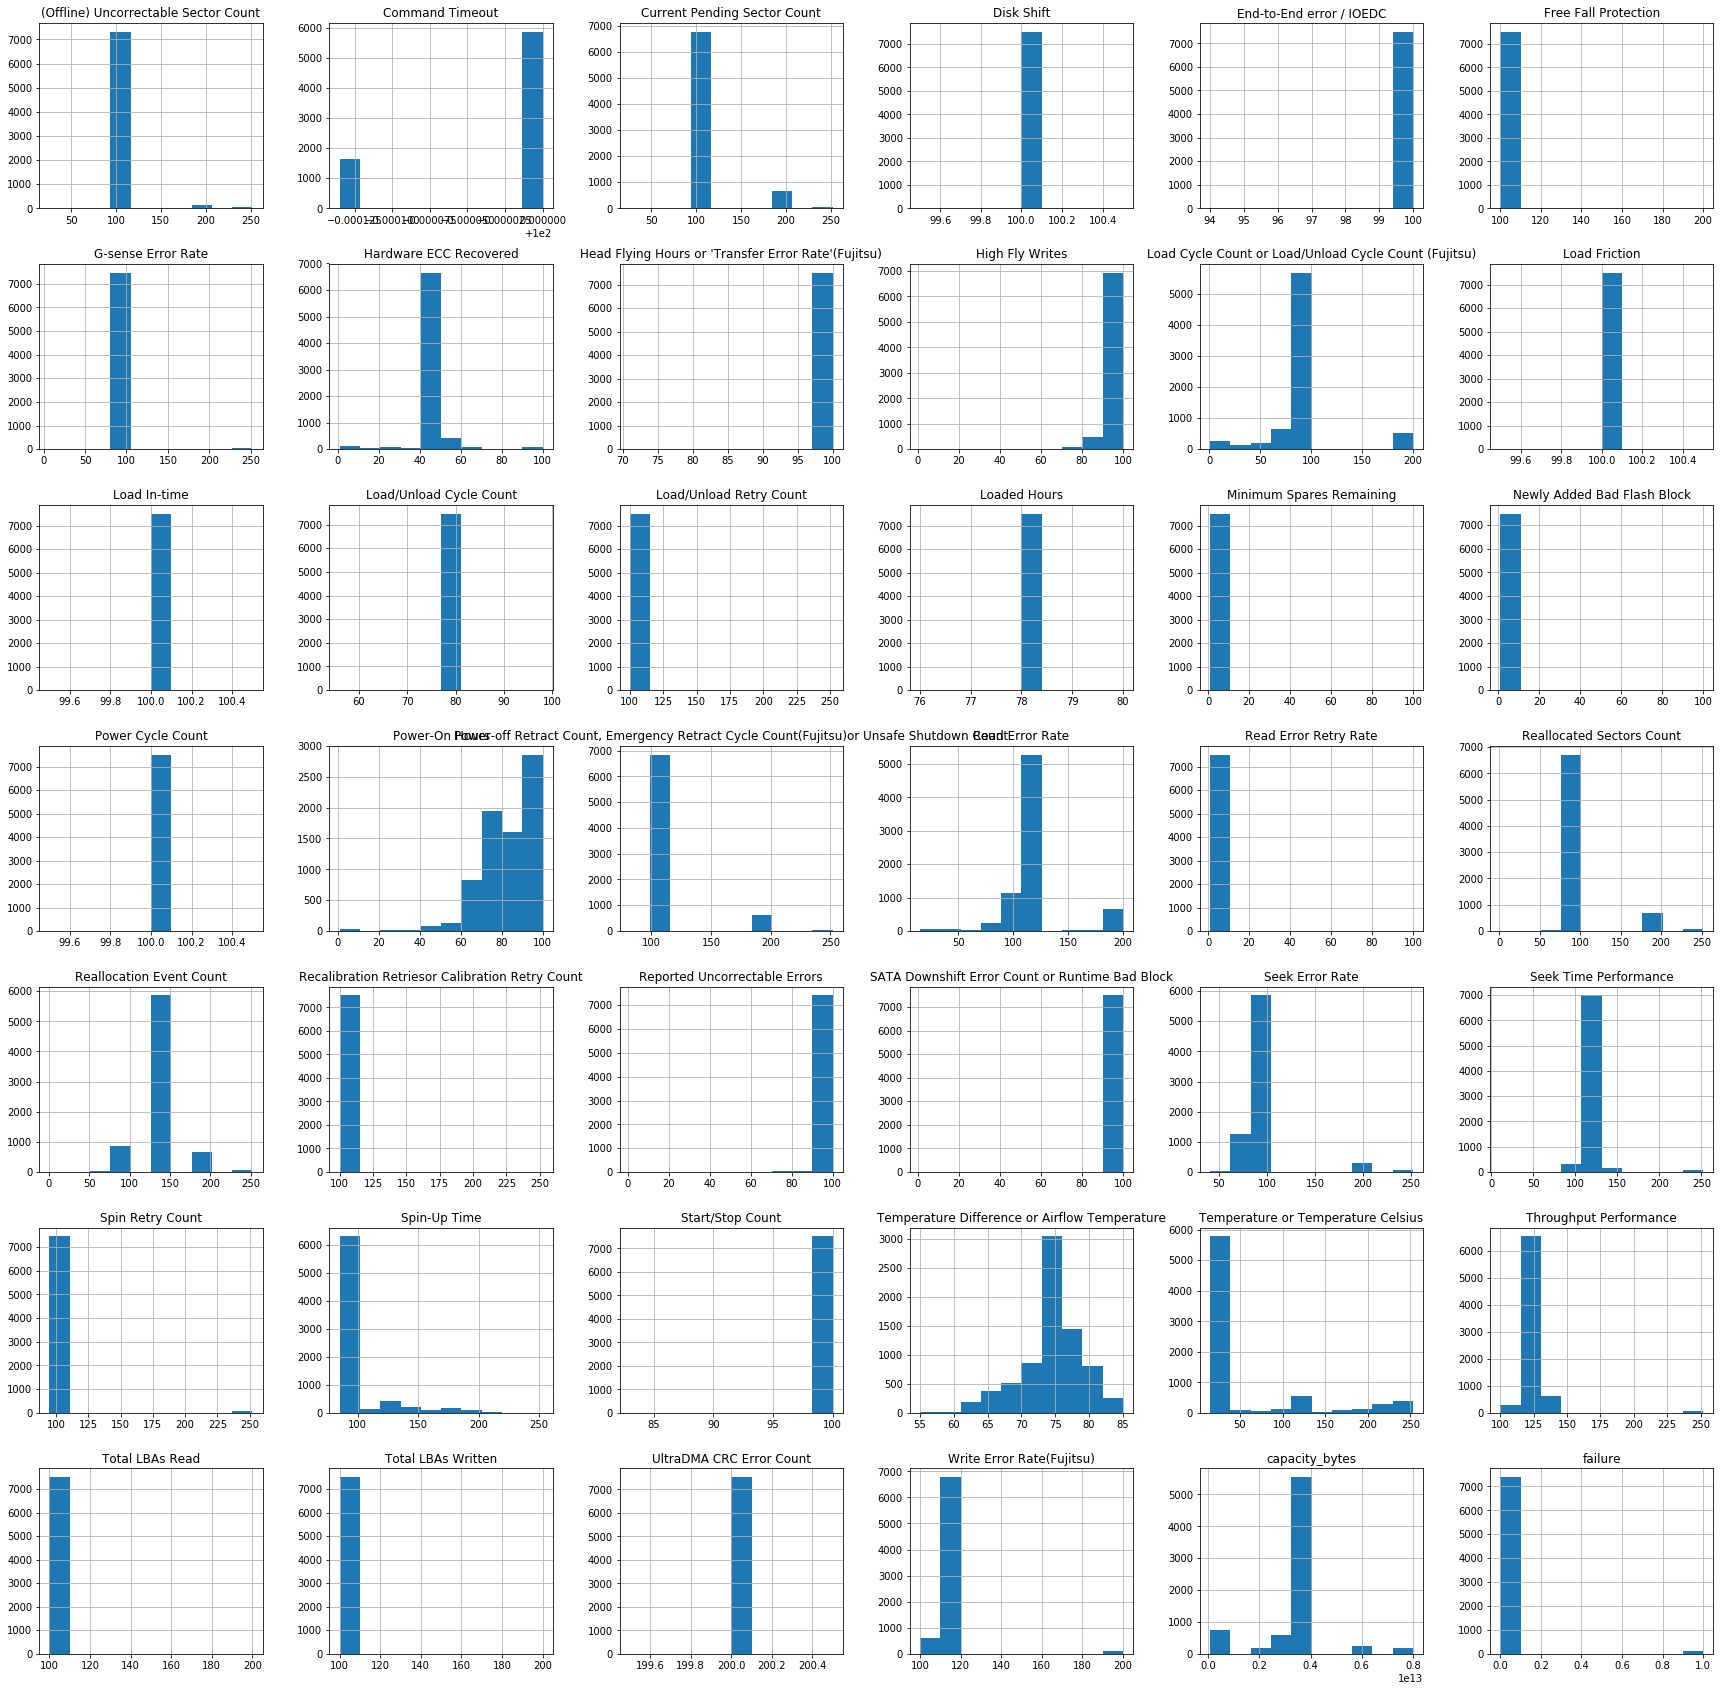

In [7]:
#Histograms
pd.DataFrame.hist(data.sample(frac=0.1), figsize = [30,30]);

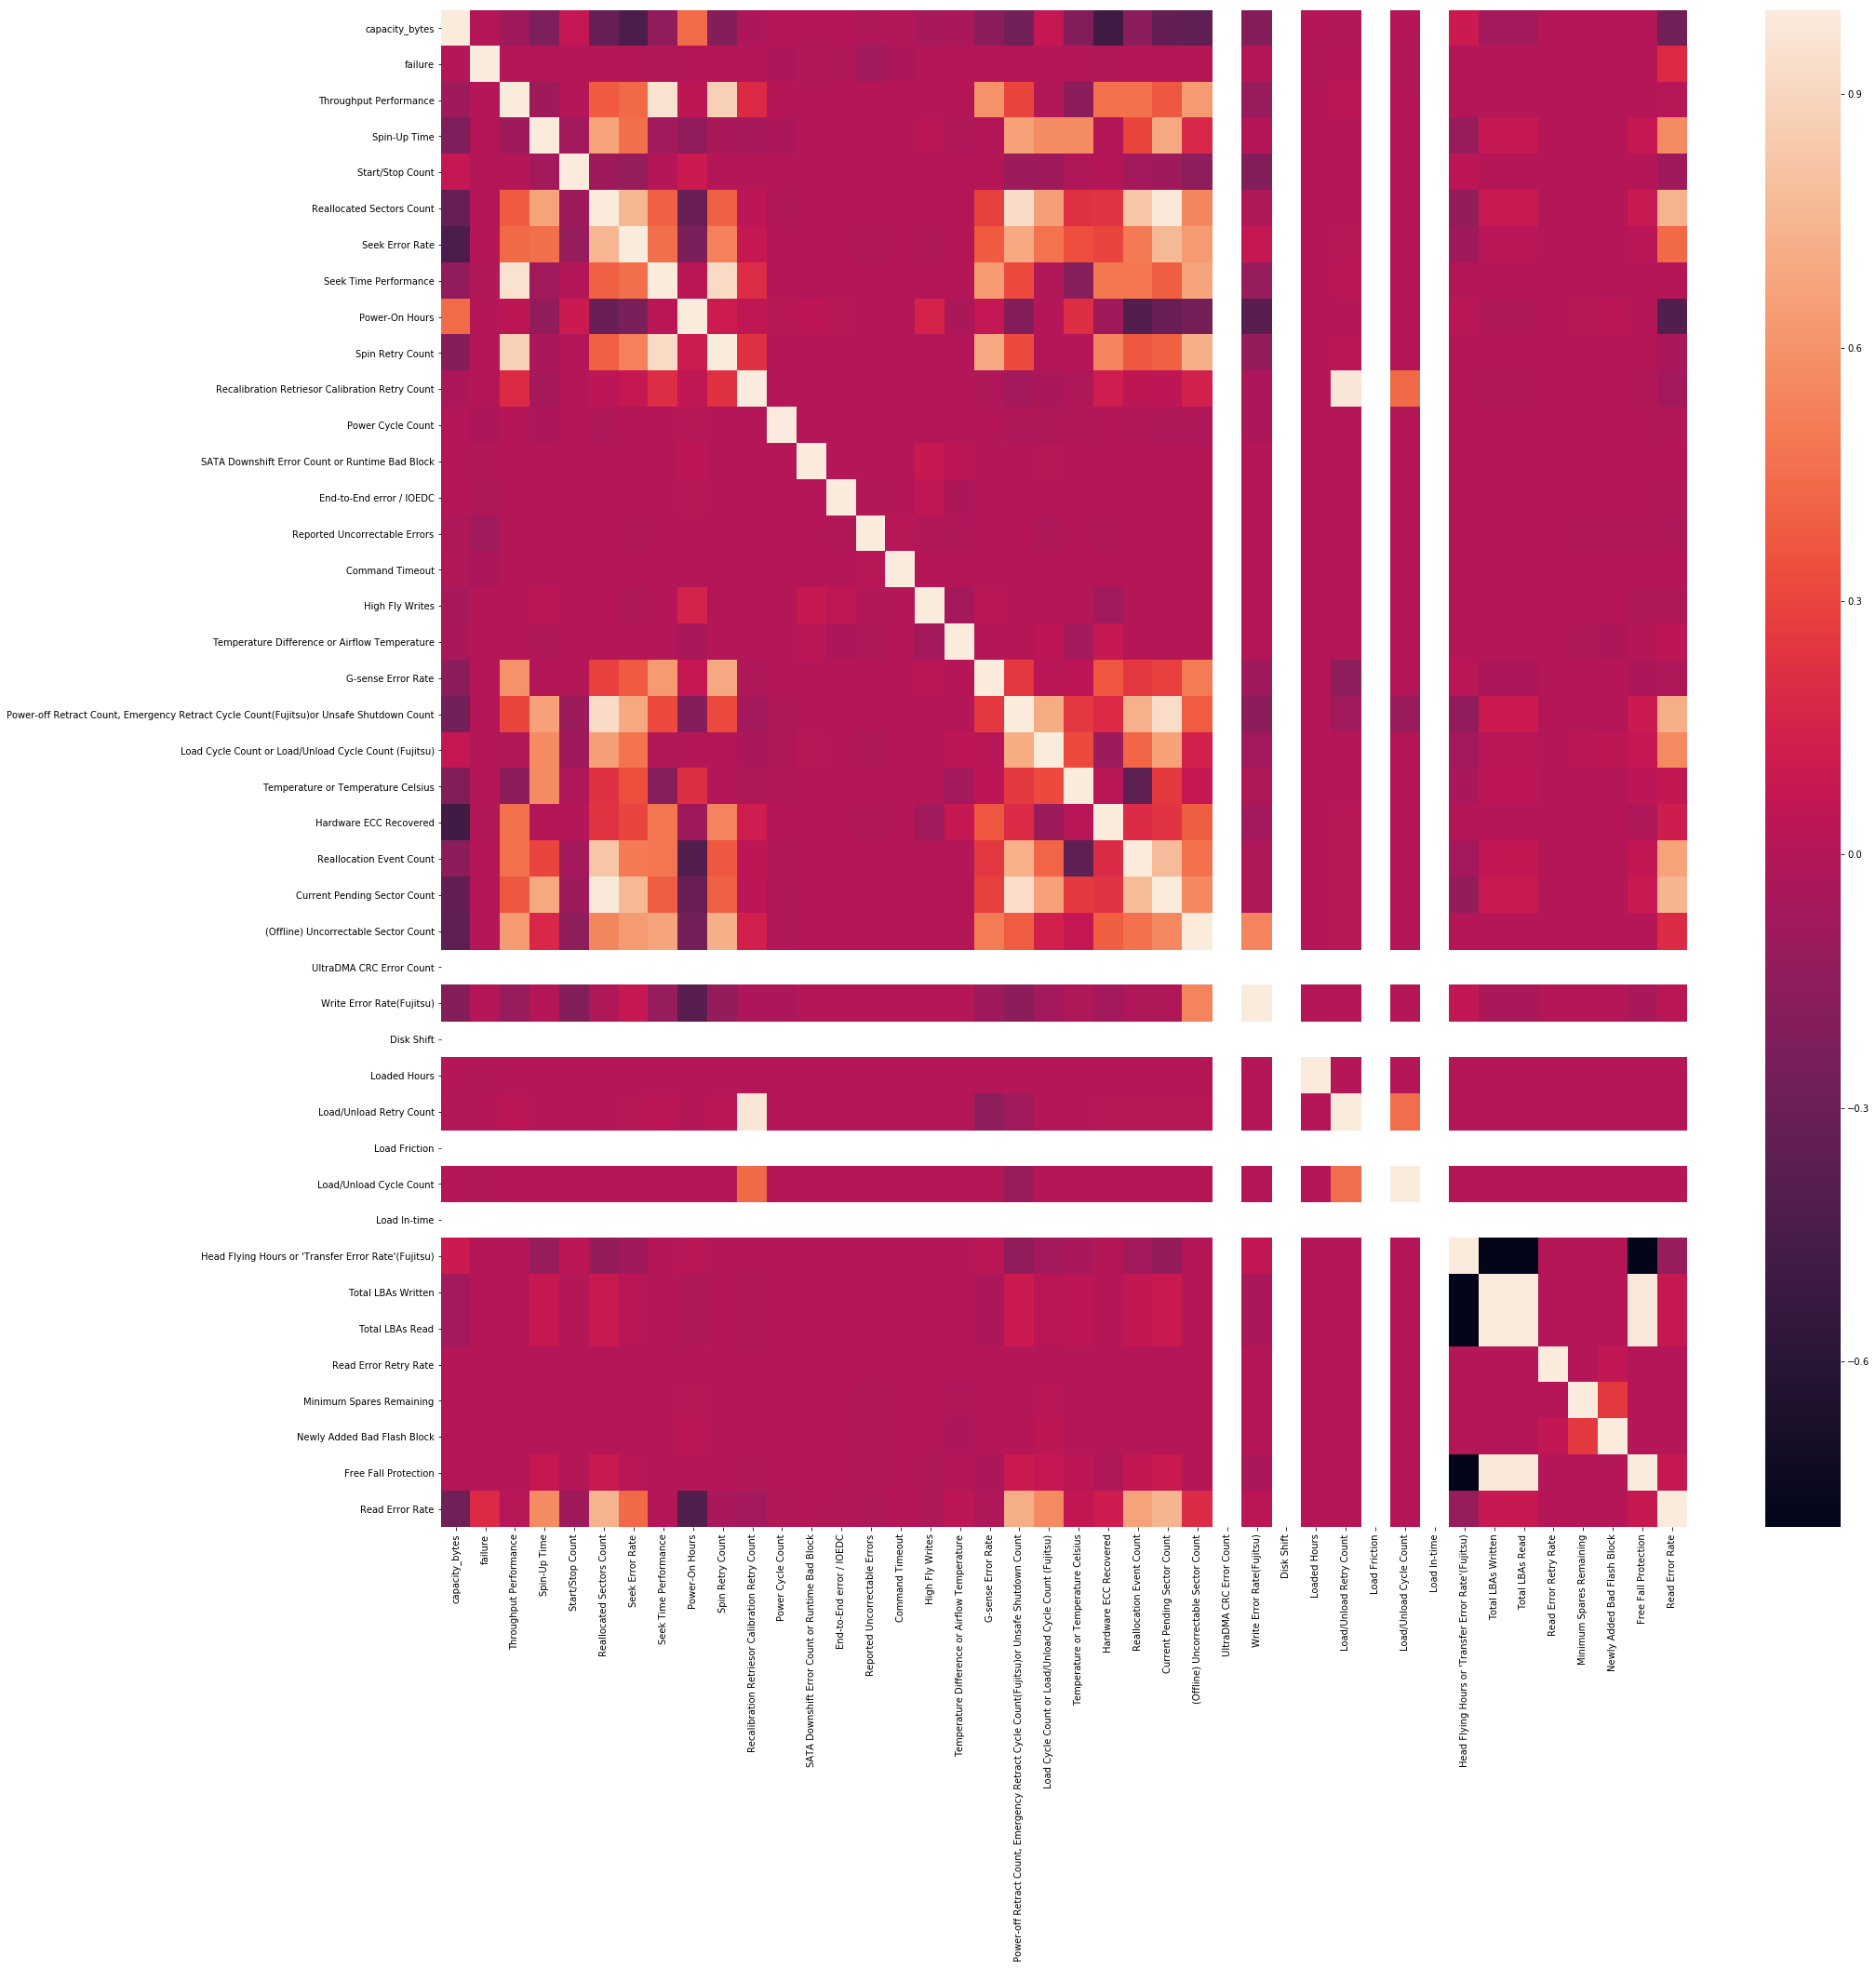

In [8]:
#Correlations within data sets

corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Task 3 Feature engineering

In [9]:
data.groupby('failure').count()

,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
failure,,,,,,,,,,,,,,,,,,,,,
0,73733,73733,73733,73733,73733,73733,73733,73733,73733,73733,...,73733,73733,73733,73733,73733,73733,73733,73733,73733,73733
1,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,...,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397


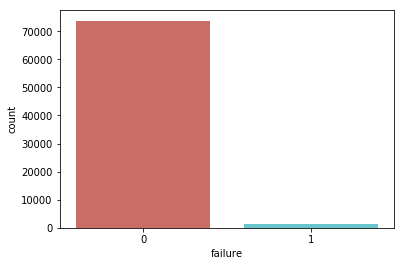

In [10]:
sns.countplot(x='failure',data=data, palette='hls')

Logistic Regission is chosen as the results can be are labeled as binary. 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
dataSmall = data.drop(['failure'], axis = 1)
X = dataSmall.values # X are the input (or independent) variables
y = data['failure'].values # Y is output (or dependent) variable

,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,4000787030016,130.084563,96.0,100.0,100.0,77.0,120.649283,99.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,114.000000
1,4000787030016,134.000000,138.0,100.0,100.0,100.0,113.000000,99.0,100.0,100.720793,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,100.000000
2,4000787030016,130.084563,91.0,100.0,100.0,84.0,120.649283,81.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,120.000000
3,4000787030016,130.084563,91.0,100.0,100.0,88.0,120.649283,76.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,117.000000
4,2000398934016,130.084563,100.0,100.0,200.0,100.0,120.649283,86.0,100.0,100.000000,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,200.000000
5,4000787030016,130.084563,91.0,100.0,100.0,85.0,120.649283,78.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,115.000000
6,4000787030016,130.084563,92.0,100.0,100.0,88.0,120.649283,75.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,117.000000
7,6001175126016,130.084563,100.0,100.0,200.0,200.0,120.649283,89.0,100.0,100.000000,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,200.000000
8,4000787030016,130.084563,98.0,100.0,100.0,87.0,120.649283,89.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,117.000000
9,4000787030016,130.084563,92.0,100.0,100.0,86.0,120.649283,78.0,100.0,100.720793,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,117.000000


Since the Data set is very large - I use recursive feature elimination algorithm to determine those features that are important for predicting the outcome of interest.

In [13]:
from sklearn.feature_selection import RFE # import the package

In [14]:
logreg = LogisticRegression() # create the model

In [15]:
##First recursive feature elimination
selector = RFE(logreg) # defaults to half the features
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True False  True  True  True False  True  True False False
 False False False False False  True  True False False False  True  True
  True  True  True False False  True False False False False  True  True
 False False False  True  True]
[ 1  1  1  9  1  1  1 18  1  1  4 11  8  2  3 12 16  1  1 13 17 19  1  1
  1  1  1  7 15  1  5 14  6 10  1  1 22 21 20  1  1]


In [16]:
#Second recursive feature elimination

cols = [0,3,7,10,11,12,13,14,15,16,19,20,21,27,28,30,31,32,33]
dataSmall = dataSmall.drop(dataSmall.columns[cols], axis=1)
X = dataSmall.values
selector = RFE(logreg) # defaults to half the features
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)


[False False False False False  True  True  True False  True  True  True
  True  True  True False False False  True False False  True]
[ 4 11 10 12  5  1  1  1  8  1  1  1  1  1  1  6  2  7  1  9  3  1]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data', len(X_train), len(y_train))
print('Test data', len(X_test), len(y_test))

Training data 52591 52591
Test data 22539 22539


## Task 4 Model fitting

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Task 5 Model evaluation

In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy score: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy score: 0.99


## Task 6 Produce recommendations

In [20]:
data.describe()

,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
count,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,3.666340e+12,0.018594,130.084563,102.174835,99.985611,109.128061,93.192498,120.649283,83.165451,101.145192,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,118.856254
std,1.423955e+12,0.135089,12.265414,21.576988,0.481049,31.055106,26.428754,12.486162,13.571579,13.167474,...,0.828246,0.0,0.993018,2.800947,2.800947,0.361136,1.610741,5.904779,2.780486,28.290474
min,-1.000000e+00,0.000000,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,...,56.000000,100.0,71.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,15.275819
25%,4.000787e+12,0.000000,130.084563,92.000000,100.000000,100.000000,84.000000,120.649283,74.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,111.000000
50%,4.000787e+12,0.000000,130.084563,95.000000,100.000000,100.000000,87.000000,120.649283,85.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,116.000000
75%,4.000787e+12,0.000000,130.084563,98.000000,100.000000,100.000000,90.000000,120.649283,94.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,118.000000
max,8.001563e+12,1.000000,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,...,98.000000,100.0,100.000000,200.000000,200.000000,100.000000,100.000000,100.000000,200.000000,200.000000


In [27]:
dataNew = pd.read_csv('ml_summative_predict.csv',sep = ';')
dataRaw = dataNew
dataRaw.isnull().sum()

Unnamed: 0                                                                                   0
date                                                                                         0
serial_number                                                                                0
model                                                                                        0
capacity_bytes                                                                               0
Throughput Performance                                                                     153
Spin-Up Time                                                                                 0
Start/Stop Count                                                                             0
Reallocated Sectors Count                                                                    0
Seek Error Rate                                                                              0
Seek Time Performance                             

In [28]:
cols = [0,1,2,3,4,15,16,17,34,48]
dataNew = dataNew.drop(dataNew.columns[cols], axis=1)
dataNew = dataNew.fillna(dataNew.mean(axis=0))

dataNew['Disk Shift'] = data['Disk Shift'].mean()
dataNew['Loaded Hours'] = data['Loaded Hours'].mean()
dataNew['Load Friction'] = data['Load Friction'].mean()
dataNew['Load In-time'] = data['Load In-time'].mean()
dataNew['Seek Error Rate'] = data['Seek Error Rate'].mean()
dataNew['Read Error Retry Rate'] = data['Read Error Retry Rate'].mean()
dataNew['Minimum Spares Remaining'] = data['Minimum Spares Remaining'].mean()
dataNew['Newly Added Bad Flash Block'] = data['Newly Added Bad Flash Block'].mean()
dataNew['Free Fall Protection'] = data['Free Fall Protection'].mean()

dataNew

dataNew.isnull().sum()

Throughput Performance                                                                     0
Spin-Up Time                                                                               0
Start/Stop Count                                                                           0
Reallocated Sectors Count                                                                  0
Seek Error Rate                                                                            0
Seek Time Performance                                                                      0
Power-On Hours                                                                             0
Spin Retry Count                                                                           0
Recalibration Retriesor Calibration Retry Count                                            0
Power Cycle Count                                                                          0
SATA Downshift Error Count or Runtime Bad Block                       

In [29]:
dataNew.dtypes

Throughput Performance                                                                     float64
Spin-Up Time                                                                                 int64
Start/Stop Count                                                                             int64
Reallocated Sectors Count                                                                    int64
Seek Error Rate                                                                            float64
Seek Time Performance                                                                      float64
Power-On Hours                                                                               int64
Spin Retry Count                                                                             int64
Recalibration Retriesor Calibration Retry Count                                            float64
Power Cycle Count                                                                            int64
SATA Downs

In [30]:
cols = [3,7,10,11,12,13,14,15,16,19,20,21,27,28,30,31,32]
dataNew = dataNew.drop(dataNew.columns[cols], axis=1)
X_pred = dataNew.values

In [31]:
y_pred = logreg.predict(X_pred)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy score: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy score: 0.99


No failures have are prected from the provided data set. 